In [1]:
%matplotlib
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data.head()

Using matplotlib backend: Qt5Agg


,city,date,fare,ride_id,driver_count,type,color
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,red
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,red
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,red
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,red
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,red


In [2]:
# Let's check for any missing variables
pyber_data.count()

# Nothing to worry about - all values represented

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
color           2375
dtype: int64

In [3]:
# let's confirm data startistics
# pyber_data.describe()

# Average fare = $26.75, Avg. Driver count = 30

In [4]:
# Let's confirm data types
# pyber_data.dtypes

In [5]:
# Remove unwanted columns
pdr_df = pyber_data.loc[:, ["type", "city", "fare", "driver_count", "color"]]
pdr_df.head(10)

,type,city,fare,driver_count,color
0,Urban,Lake Jonathanshire,13.83,5,red
1,Urban,South Michelleport,30.24,72,red
2,Urban,Port Samanthamouth,33.44,57,red
3,Urban,Rodneyfort,23.44,34,red
4,Urban,South Jack,34.58,46,red
5,Urban,South Latoya,9.52,10,red
6,Urban,New Paulville,43.25,44,red
7,Urban,Simpsonburgh,35.98,21,red
8,Urban,South Karenland,35.09,4,red
9,Urban,North Jasmine,42.81,33,red


In [6]:
# Filter on City type
urban_cities = pdr_df[pdr_df["type"]=="Urban"]
suburban_cities = pdr_df[pdr_df["type"]=="Suburban"]
rural_cities = pdr_df[pdr_df["type"]=="Rural"]


In [7]:
# Calc number of rides per city type
total_urban_rides = urban_cities.groupby(["city"]).count()["fare"]
total_suburban_rides = suburban_cities.groupby(["city"]).count()["fare"]
total_rural_rides = rural_cities.groupby(["city"]).count()["fare"]


In [8]:
# Calculate avg. fare per city type    
total_urban_fares = urban_cities.groupby(["city"]).mean()["fare"]
total_suburban_fares = suburban_cities.groupby(["city"]).mean()["fare"]
total_rural_fares = rural_cities.groupby(["city"]).mean()["fare"]


In [9]:
# Calculate total driver counts per city type
total_urban_drivers = urban_cities.groupby(["city"]).max()["driver_count"]
total_suburban_drivers = suburban_cities.groupby(["city"]).max()["driver_count"]
total_rural_drivers = rural_cities.groupby(["city"]).max()["driver_count"]


## Bubble Plot of Ride Sharing Data

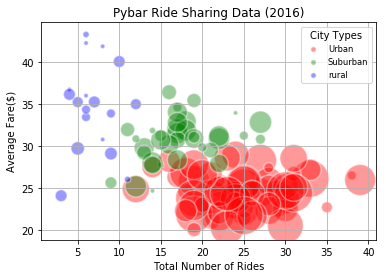

In [15]:
# Create scatter plots for each city type (this method allows us to create proper legends)

plt.scatter(total_urban_rides,
            total_urban_fares,
            s=total_urban_drivers*20,
            c="red", edgecolor="white", 
            linewidths=1.5, alpha=0.4,
            label="Urban", marker="o")

plt.scatter(total_suburban_rides,
            total_suburban_fares,
            s=total_suburban_drivers*20,
            c="green", edgecolor="white", 
            linewidths=1.5, alpha=0.4,
            label="Suburban", marker="o")

plt.scatter(total_rural_rides,
            total_rural_fares,
            s=total_rural_drivers*20,
            c="blue", edgecolor="white", 
            linewidths=1.5, alpha=0.4,
            label="rural", marker="o")

# Incorporate the other graph properties
# Add titles and labels
plt.grid(True)
plt.title("Pybar Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides')
plt.ylabel('Average Fare($)')

# Create legend 
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1, loc="best",
                 title="City Types", labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Save file to output folder
plt.savefig("./Output/Pyber_Scatter.png")

# Display plot
plt.show()


## Total Fares by City Type

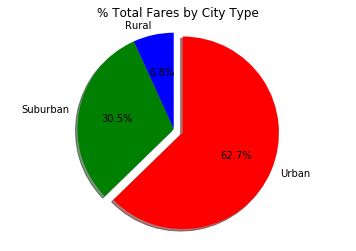

In [18]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure
# Data to plot
labels = pdr_df.groupby(["color"]).max()["type"]
avg_fair_pie = pdr_df.groupby(["color"]).sum()["fare"]
color_pie = pdr_df.groupby(["type"]).max()["color"]
explode = (0, 0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(avg_fair_pie, explode=explode, labels=labels, colors=color_pie, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% Total Fares by City Type")

# Save file to output folder
plt.savefig("./Output/Pyber_Pie1.png")

# Display plot
plt.show()

## Total Rides by City Type

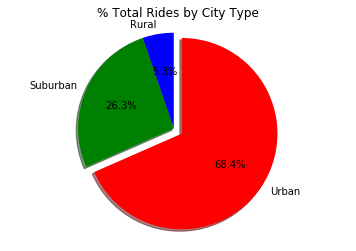

In [19]:
# Calculate Ride Percents
labels = pdr_df.groupby(["color"]).max()["type"]
ttl_rides_pie = pdr_df.groupby(["color"]).count()["fare"]
color_pie = pdr_df.groupby(["type"]).max()["color"]
explode = (0, 0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(ttl_rides_pie, explode=explode, labels=labels, colors=color_pie, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% Total Rides by City Type")

# Save file to output folder
plt.savefig("./Output/Pyber_Pie2.png")

# Display plot
plt.show()


## Total Drivers by City Type

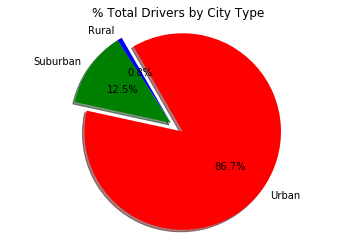

In [20]:
# Calculate Driver Percents
labels = pdr_df.groupby(["color"]).max()["type"]
ttl_drivers_pie = pdr_df.groupby(["color"]).sum()["driver_count"]
color_pie = pdr_df.groupby(["type"]).max()["color"]
explode = (0, 0, 0.15) 

fig1, ax1 = plt.subplots()
ax1.pie(ttl_drivers_pie, explode=explode, labels=labels, colors=color_pie, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% Total Drivers by City Type")

# Save file to output folder
plt.savefig("./Output/Pyber_Pie3.png")

# Display plot
plt.show()